In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
rename_cols = {"Annual Income (k$)": "Income",
               "Spending Score (1-100)": "SpendingScore"}
df = df.rename(columns=rename_cols)

In [6]:
df.shape

(200, 5)

In [7]:
df.dtypes

CustomerID        int64
Gender           object
Age               int64
Income            int64
SpendingScore     int64
dtype: object

# EDA

In [8]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [9]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
df.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


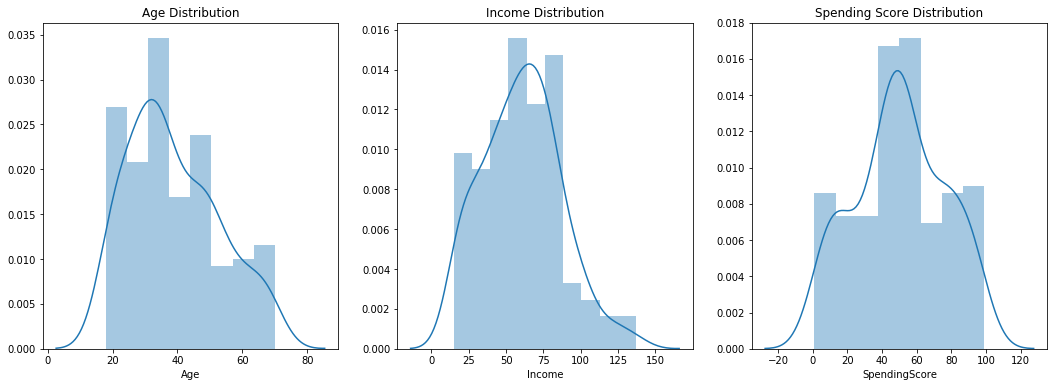

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,6))

sns.distplot(df["Age"],ax=ax[0])
ax[0].set_title("Age Distribution")

sns.distplot(df["Income"], ax=ax[1])
ax[1].set_title("Income Distribution")

sns.distplot(df["SpendingScore"], ax=ax[2])
ax[2].set_title("Spending Score Distribution")
plt.show()

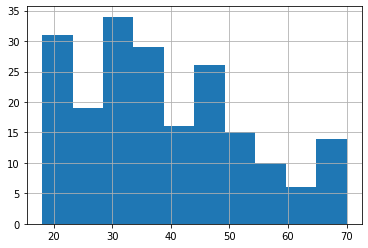

In [12]:
df["Age"].hist()

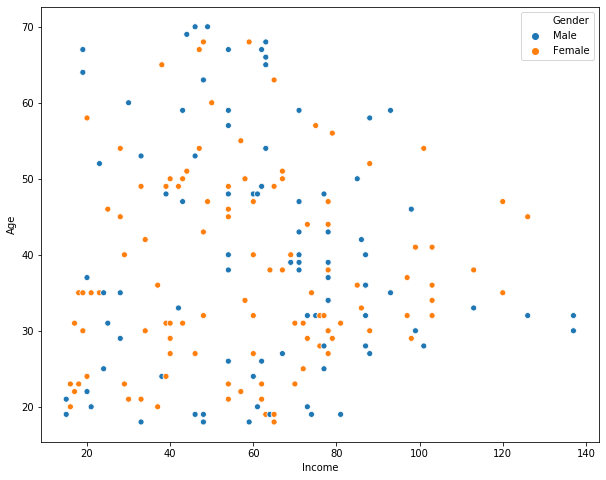

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="Income", y="Age", hue="Gender");

In [14]:
def scatter_plot_2d(df, x, y, hue):
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, style=hue);

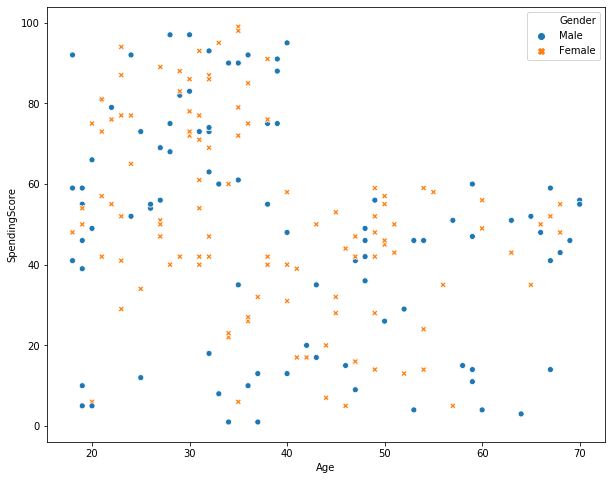

In [15]:
scatter_plot_2d(df, "Age", "SpendingScore", "Gender")

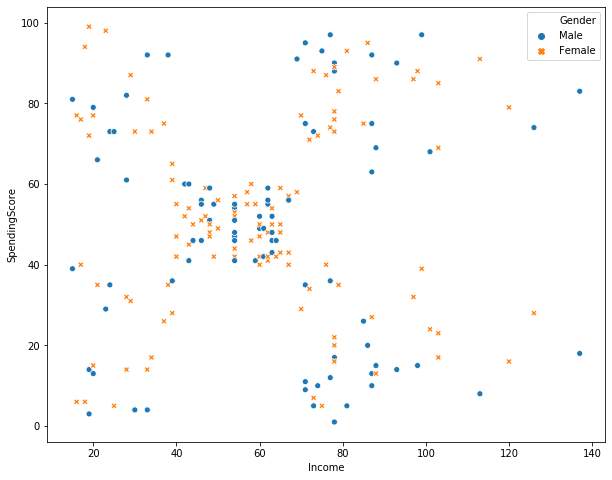

In [16]:
scatter_plot_2d(df, "Income", "SpendingScore", "Gender")

# K-Means Clustering

In [17]:
from sklearn.cluster import KMeans

In [22]:
X = df[["Age", "SpendingScore"]]
# model = KMeans(n_clusters=2, init='k-means++')
model = KMeans(n_clusters=2, init='random')
clusters = model.fit(X)

In [23]:
cluster_numbers = clusters.predict(X)
cluster_numbers

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [24]:
X.head()

,Age,SpendingScore
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [25]:
X['new'] = cluster_numbers

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
X.head()

,Age,SpendingScore,new
0,19,39,1
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,1


In [29]:
# X[X['new']==0]

In [30]:
df['new'] = cluster_numbers
df['new'].value_counts()

1    115
0     85
Name: new, dtype: int64

In [ ]:
df[df['new']==1].head()

In [31]:
def scatter_plot_2d(df, x, y, hue):
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, style=hue);

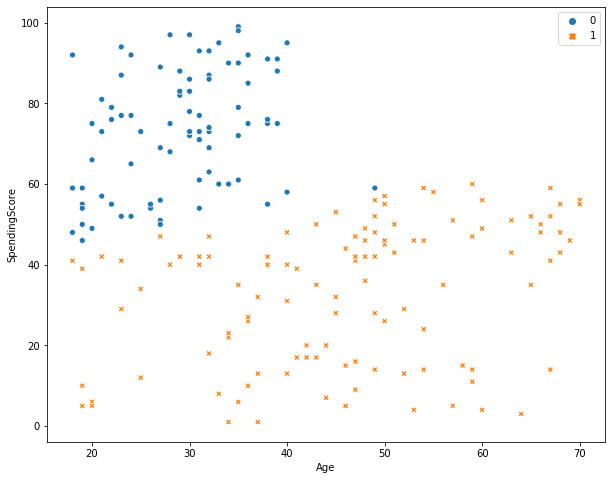

In [32]:
scatter_plot_2d(df, "Age", "SpendingScore", cluster_numbers)

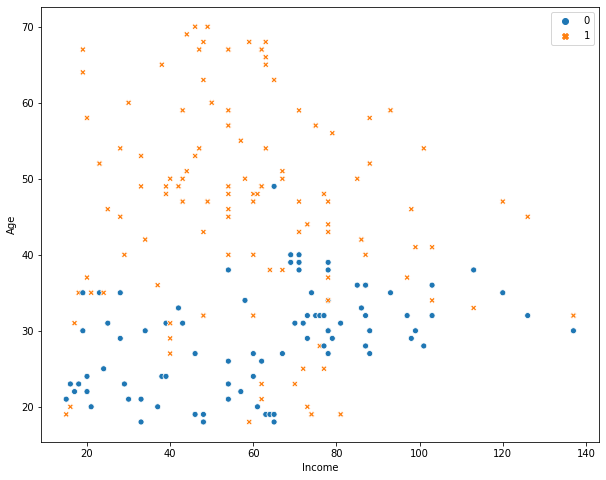

In [33]:
scatter_plot_2d(df, "Income", "Age", cluster_numbers)

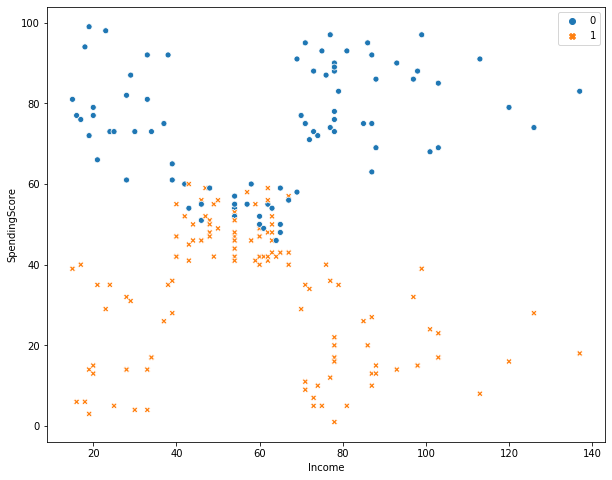

In [34]:
scatter_plot_2d(df, "Income", "SpendingScore", cluster_numbers)

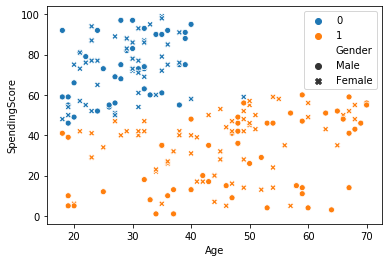

In [35]:
sns.scatterplot(data=df, x='Age', y='SpendingScore', hue=cluster_numbers, style='Gender')
plt.show()

## Determining optimal number of clusters

Using elbow plot

In [36]:
X1 = df[["Age", "SpendingScore"]]
clusters1 = KMeans(n_clusters=2, n_init=10, init="random").fit(X1)

In [37]:
clusters1.inertia_

75949.15601023017

In [46]:
results = []
for i in range(1,10):
    X_n = df[["Age", "SpendingScore"]]
    clusters_n = KMeans(n_clusters=i, n_init=10, init="random").fit(X_n)
    results.append({"n": i, "inertia": clusters_n.inertia_})
elbow_plot = pd.DataFrame(results)

In [47]:
elbow_plot

,inertia,n
0,171535.500000,1
1,75949.156010,2
2,45840.676616,3
3,28165.583567,4
4,23811.523525,5
5,19781.870157,6
6,15594.532727,7
7,13070.888156,8
8,12132.195624,9


Text(0.5, 1.0, 'Optimal Number of Clusters')

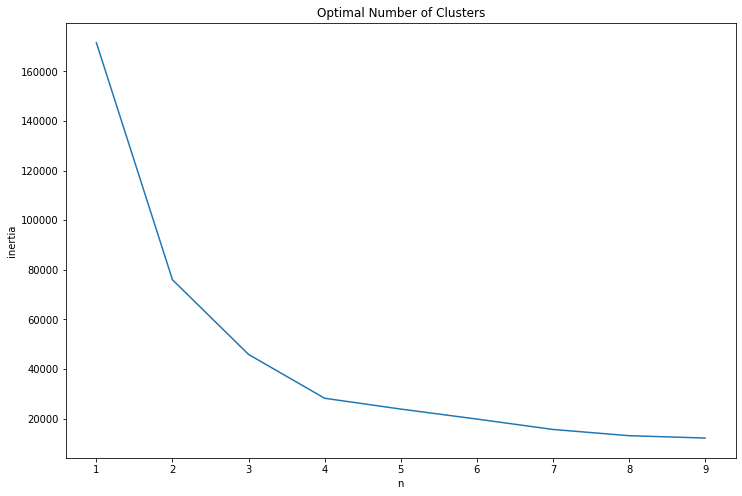

In [48]:
plt.figure(figsize=(12,8))
sns.lineplot(data=elbow_plot, x="n", y="inertia")
plt.title("Optimal Number of Clusters")

In [42]:
def plot_elbow(df, dims):
    results = []
    for i in range(1,10):
        X_n = df[dims]
        clusters_n = KMeans(n_clusters=i, n_init=10, init="random").fit(X_n)
        results.append({"n": i+1, "inertia": clusters_n.inertia_})
    elbow_plot = pd.DataFrame(results)
    
    plt.figure(figsize=(12,8))
    sns.lineplot(data=elbow_plot, x="n", y="inertia")
    plt.title("Optimal Number of Clusters")

In [ ]:
plot_elbow(df, ["Age", "SpendingScore", 'Income'])

In [ ]:
def cluster_2d(df, x, y, n_clusters):
    X = df[[x, y]]
    clusters = KMeans(n_clusters=n_clusters, n_init=10, init="random").fit(X)
    scatter_plot_2d(df, x, y, clusters.predict(X))

In [ ]:
cluster_2d(df, "Age", "SpendingScore", 4)

In [ ]:
model = KMeans(n_clusters=4, n_init=10, init="random")
clusters = model.fit(df[["Age", "SpendingScore"]])
cluster_numbers = clusters.predict(df[["Age", "SpendingScore"]])
cluster_numbers

In [ ]:
X2 = df.assign(cluster=cluster_numbers)
X2 = df.drop(columns = 'CustomerID', axis=1)

In [ ]:
X2.drop('Gender', axis =1,inplace=True)

In [ ]:
X2.head()

In [ ]:
clusters = model.fit(df[["Age", "SpendingScore",'Income']])

In [ ]:
import plotly
import plotly.graph_objs as go

In [ ]:
# scatter = go.Scatter3d(x=X2["Age"],
#                      y=X2["Income"],
#                      z=X2["SpendingScore"],
#                      mode="markers",
#                      marker={"color": clusters.predict(X2),
#                              "size": 8,
#                              "line": {"color": clusters.predict(X2),
#                                       "width":12}});

# layout = go.Layout(title="Clusters",
#                    scene={"xaxis": {"title": "Age"},
#                           "yaxis": {"title": "Income"},
#                           "zaxis": {"title": "SpendingScore"}});

# fig = go.Figure(data=scatter, layout=layout);
# plotly.offline.iplot(fig)